# A notebook to to get true and predicted CTann and RUI for HRApop atlas datasets


## Goal

See [this GitHub issue](https://github.com/x-atlas-consortia/hra-pop/issues/100)


## Import libraries


In [39]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from pprint import pprint
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity

In [40]:
import hra_api_client

from hra_api_client.api import v1_api as default_api
from hra_api_client.models.sparql_query_request import SparqlQueryRequest

Configure HRA API client and create API instance

In [41]:
# may need to remove `v1`
configuration = hra_api_client.Configuration(
    host="https://apps.humanatlas.io/api"
)

api_client = hra_api_client.ApiClient(configuration)
api_instance = default_api.V1Api(api_client)

## Set global variables


In [42]:
hra_pop_version = "v0.11.1"

## Load data


In [43]:
# df_x = pd.read_csv("data/validation-v7-ctann-rui.csv")
df_x = pd.read_csv(
  f"../../../hra-pop/output-data/{hra_pop_version}/reports/atlas/validation-v7-x-axis.csv")
df_y = pd.read_csv(
  f"../../../hra-pop/output-data/{hra_pop_version}/reports/atlas/validation-v7-y-axis.csv")

## Prepare data for visualization and visualize


In [44]:
df_x

,sex,sample,rui_location,dataset,tool,modality,organ,organId,datasetVsRuiSim
0,Female,https://doi.org/10.1126/science.abl4290#GTEX-1CAMS-5015-SM-HPJ3C_TissueBlock,http://purl.org/ccf/1.5/3b5d2036-3c56-4cf8-808f-462c9e3681e5,https://doi.org/10.1126/science.abl4290#GTEX-1CAMS-5015-SM-HPJ3C,popv,sc_transcriptomics,Set of lactiferous glands in right breast,FMA:57987,0.950561
1,Female,https://doi.org/10.1126/science.abl4290#GTEX-1MCC2-5013-SM-HPJ3D_TissueBlock,http://purl.org/ccf/1.5/3b5d2036-3c56-4cf8-808f-462c9e3681e5,https://doi.org/10.1126/science.abl4290#GTEX-1MCC2-5013-SM-HPJ3D,popv,sc_transcriptomics,Set of lactiferous glands in right breast,FMA:57987,0.943954
2,Female,https://doi.org/10.1126/science.abl4290#GTEX-1R9PN-5002-SM-HD2MC_TissueBlock,http://purl.org/ccf/1.5/3b5d2036-3c56-4cf8-808f-462c9e3681e5,https://doi.org/10.1126/science.abl4290#GTEX-1R9PN-5002-SM-HD2MC,popv,sc_transcriptomics,Set of lactiferous glands in right breast,FMA:57987,0.935120
3,Female,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,http://purl.org/ccf/1.5/9abfed4e-2fde-4d80-a8aa-7439a106d895,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,azimuth,sc_transcriptomics,heart,UBERON:0000948,0.912194
4,Female,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,http://purl.org/ccf/1.5/9abfed4e-2fde-4d80-a8aa-7439a106d895,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,celltypist,sc_transcriptomics,heart,UBERON:0000948,0.674430
...,...,...,...,...,...,...,...,...,...
324,Female,https://entity.api.hubmapconsortium.org/entities/3d2bc79885fc7720f77fddd2c23f02e5,http://purl.org/ccf/1.5/fa9ecb7f-16d5-4733-bc89-46496a9e886e,https://entity.api.hubmapconsortium.org/entities/f71249f6e349fb9a99a3d4f08541cab4,popv,sc_transcriptomics,spleen,UBERON:0002106,0.813660
325,Female,https://entity.api.hubmapconsortium.org/entities/00692d825321017faeb5f99a3b8d28fc,http://purl.org/ccf/1.5/7af72c8f-7fa1-4083-be74-613f92ef020a,https://entity.api.hubmapconsortium.org/entities/56060793c38c82d8c312e5e05d5d189b,popv,sc_transcriptomics,urinary bladder,UBERON:0001255,0.520715
326,Female,https://entity.api.hubmapconsortium.org/entities/162e4c0b6fe58a9ed7c8ded7c34e1e8d,http://purl.org/ccf/1.5/ca285e1d-d2b4-4089-9059-11c95d788154,https://entity.api.hubmapconsortium.org/entities/6f1b0a72a5e10af1474cec9a8804b8f5,popv,sc_transcriptomics,urinary bladder,UBERON:0001255,0.151007
327,Female,https://entity.api.hubmapconsortium.org/entities/ba7ab7d58cb65f287b900673d6bf9cf3,http://purl.org/ccf/1.5/cef949fe-5100-4175-b87b-0172df815a6a,https://entity.api.hubmapconsortium.org/entities/cae2beaf3926759549dbf4128d6b5ebd,popv,sc_transcriptomics,urinary bladder,UBERON:0001255,0.963884


In [45]:
df_y

,sex,rui_location,dataset,tool,predicted_rui,similarity
0,Female,http://purl.org/ccf/1.5/4af4b1bd-c71d-4ade-a9f6-47b2ccc9f5bb,https://entity.api.hubmapconsortium.org/entities/8a5592389339a77ce7697f516aa721fe,popv,http://purl.org/ccf/1.5/9d795171-ba1f-4ae2-9b98-9a285280ebf6,0.999441
1,Female,http://purl.org/ccf/1.5/8f99a469-7d51-46dc-919d-2e002eeae868,https://entity.api.hubmapconsortium.org/entities/97c65df1d8fdc8d67c34a55e386fd430,azimuth,http://purl.org/ccf/1.5/70ad7ae6-c9af-4975-98e2-98c249e36ddd,0.829683
2,Female,http://purl.org/ccf/1.5/8f99a469-7d51-46dc-919d-2e002eeae868,https://entity.api.hubmapconsortium.org/entities/fd0b0c1d050010de3520492147aacef4,azimuth,http://purl.org/ccf/1.5/1d965182-bf13-4738-af05-72b817121959,0.780118
3,Female,http://purl.org/ccf/1.5/f6512db4-2809-4ffe-864d-ace61789dff6,https://doi.org/10.1126/science.abl4290#GTEX-13N11-5002-SM-H5JDV,popv,http://purl.org/ccf/1.5/ca476545-5b98-476c-b2fd-1b8e1708faed,0.991253
4,Female,http://purl.org/ccf/1.5/3425fa0c-c5cb-4493-b6ba-41520334b13e,https://entity.api.hubmapconsortium.org/entities/71477f504b0069828a368009fa3ab1ad,celltypist,http://purl.org/ccf/1.5/cd304e60-3de4-4dd9-b289-ce1a0efae4d7,0.561964
...,...,...,...,...,...,...
327,Female,http://purl.org/ccf/1.5/1fe61622-ba53-47c9-967e-e764c21b8189,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#H7$h...,celltypist,http://purl.org/ccf/1.5/05c11830-1526-4472-bd12-ea24dbcfd3cc,0.599922
328,Female,http://purl.org/ccf/1.5/502166ab-e841-4b65-9045-7c386166a9e8,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D5$l...,azimuth,http://purl.org/ccf/1.5/f6512db4-2809-4ffe-864d-ace61789dff6,0.756365
329,Female,http://purl.org/ccf/1.5/9abfed4e-2fde-4d80-a8aa-7439a106d895,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D4$a...,azimuth,http://purl.org/ccf/1.5/05c11830-1526-4472-bd12-ea24dbcfd3cc,0.963610
330,Female,http://purl.org/ccf/1.5/05c11830-1526-4472-bd12-ea24dbcfd3cc,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#H7$i...,celltypist,http://purl.org/ccf/1.5/1fe61622-ba53-47c9-967e-e764c21b8189,0.950462


## Compute similarity scores for %AS


### Load atlas enriched dataset graph


In [ ]:
ds_graph_path = f"../../../hra-pop/output-data/{hra_pop_version}/atlas-enriched-dataset-graph.jsonld"

with open(ds_graph_path) as f:
  graph = json.load(f)

### Define functions


In [ ]:

def dict_to_vec(dict1: dict, dict2: dict):


  """Takes two dictionaries and returns a tuple of nornalized lists with values (0 if key not present)



  Args:


    dict1 (dict): dictionary 1


    dict2 (dict): dictionary 2


  Returns:


    result (tuple): a tuple with normalized lists


  """



  # initialize result


  dict1_list = []


  dict2_list = []



  # handle shared keys


  shared_keys = set(dict1['collisions'].keys()).intersection(


    dict2['collisions'].keys())



  for key in shared_keys:


    dict1_list.append(dict1['collisions'][key])


    dict2_list.append(dict2['collisions'][key])



  # handle not shared keys


  keys_in_dict1_not_in_dict2 = dict1.keys() - dict2.keys()


  for key in keys_in_dict1_not_in_dict2:


    dict1[key] = 0



  keys_in_dict2_not_in_dict1 = dict2.keys() - dict1.keys()


  for key in keys_in_dict2_not_in_dict1:


    dict1[key] = 0



  return (dict1_list, dict2_list)




def get_as_collision_items(iri: str, get_organ = False):


  """A function to get AS collision items for an IRI (extraction site) and return a dictionary with AS UBERON ID and intersection percentage of the extraction site. 


  This uses https://apps.humanatlas.io/api/#get-/v1/extraction-site to get the rui_location data given the IRI and https://apps.humanatlas.io/api/#post-/v1/collisions to get the collisions



  Args:


    iri (str): an IRI for an extraction site



  Returns:


    a dictionary with the IRI and a nested dictionary with collisions (ID and percentage) 


  """



  result = {



  }
  
 


  # get extraction site


  base_url_extraction_site = "https://apps.humanatlas.io/api/v1/extraction-site?iri="


  extraction_site = ""
  


  response = requests.get(base_url_extraction_site+iri)


  try:
    extraction_site = json.loads(response.text)
  except Exception as e:
    print(f"Non-success status code given {iri}: {e} has {response.status_code}")
    return result  # Or use an empty dictionary, or any other placeholder
  
  try:
    # send extraction site to /collisions endpoints
    collisions = api_instance.collisions(extraction_site)
    for item in collisions:
      result[item['representation_of']] = item['percentage_of_tissue_block']

    if get_organ:
        result['organ'] = extraction_site['placement']['target']
  except Exception as e:
    print(f"Collision error with IRI {iri}: {e}")
    return result  # Or use an empty dictionary, or any other placeholder

  return result




def compute_cosine_similarity_by_as_percentage(iri_1: str, iri_2: str):


  """Takes two IRIs of extraction sites and returns the cosine similarity of their AS percentages



  Args:


          iri_1 (str): An IRI for an extraction site


          iri_2 (str): An IRI for an extraction site



Returns: 


          similarity (float): A cosine similarity


  """



  # Get AS collision items as dict


  dict1 = get_as_collision_items(iri_1)


  dict2 = get_as_collision_items(iri_2)



  # Get a combined set of all keys from both dictionaries


  all_keys = set(dict1.keys()).union(dict2.keys())



  # Create the two lists of values


  values1 = [dict1.get(key, 0) for key in all_keys]


  values2 = [dict2.get(key, 0) for key in all_keys]



  # Compute cosine similarity


  cosine_similarity_value = cosine_similarity([values1], [values2])



  return float(cosine_similarity_value[0][0])

### Loop through pairs of extraction sites (true and predicted) in validation and compute AS% similarity score


In [ ]:
# Add a new column with the AS% cosine similarity
df_y['as_percentage_cosine_sim'] = df_y.apply(lambda row: compute_cosine_similarity_by_as_percentage(
  row['rui_location'], row['predicted_rui']), axis=1)

# Save to CSV for optional inspection in external software
df_y.to_csv("output/df_y.csv")

# print for review inline
df_y

,sex,rui_location,dataset,tool,predicted_rui,similarity,as_percentage_cosine_sim
0,Female,http://purl.org/ccf/1.5/2156f837-2ab2-4305-8e7f-8084249e91cd,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D11$...,celltypist,http://purl.org/ccf/1.5/05c11830-1526-4472-bd12-ea24dbcfd3cc,0.441815,0.532793
1,Female,http://purl.org/ccf/1.5/8f99a469-7d51-46dc-919d-2e002eeae868,https://entity.api.hubmapconsortium.org/entities/206d669d243f6dab04cc126a52cdab8d,azimuth,http://purl.org/ccf/1.5/731ade72-cdb7-4262-8be1-859396820dfd,0.792217,1.000000
2,Female,http://purl.org/ccf/1.5/f6512db4-2809-4ffe-864d-ace61789dff6,https://doi.org/10.1126/science.abl4290#GTEX-13N11-5002-SM-H5JDV,popv,http://purl.org/ccf/1.5/ca476545-5b98-476c-b2fd-1b8e1708faed,0.951883,1.000000
3,Male,http://purl.org/ccf/1.5/886e391d-0151-46d3-8a51-084bf6a06910,https://entity.api.hubmapconsortium.org/entities/c6bb00096b0cf40751f9d6003fb730c7,popv,http://purl.org/ccf/1.5/f6512db4-2809-4ffe-864d-ace61789dff6,0.957861,0.000000
4,Male,http://purl.org/ccf/1.5/da28394d-789a-4fba-842a-f8ba5046b221,https://entity.api.hubmapconsortium.org/entities/21043afd6be7ec258f8a9fa1577c41b5,popv,http://purl.org/ccf/1.5/f6512db4-2809-4ffe-864d-ace61789dff6,0.945847,0.000000
...,...,...,...,...,...,...,...
927,Male,http://purl.org/ccf/1.5/aba1ebe3-af18-40cc-b536-b89843049ca5,https://entity.api.hubmapconsortium.org/entities/faa1acc13943ee9d365b6cc6a3ea889f,popv,http://purl.org/ccf/1.5/fd4fcec2-93c3-428f-ad3a-6c7ac4196da0,0.925139,1.000000
928,Male,http://purl.org/ccf/1.5/ca23f77c-a3cd-453f-bbe9-2d8d1514fc8e,https://entity.api.hubmapconsortium.org/entities/91cfb45f5d398e950ed65786c87f4372,azimuth,http://purl.org/ccf/1.5/1f414fc5-cb93-45b7-a1b8-0cd21dfa9f7d,0.855982,0.000000
929,Male,http://purl.org/ccf/1.5/d662fd53-e925-4921-8d8b-bc91eed1519b,https://entity.api.hubmapconsortium.org/entities/84db9a72aba9ae0ef740192ad8747ee3,popv,http://purl.org/ccf/1.5/aba1ebe3-af18-40cc-b536-b89843049ca5,0.991318,0.000000
930,Male,http://purl.org/ccf/1.5/df0b33f7-371a-47a4-a636-a27db19bdbc9,https://entity.api.hubmapconsortium.org/entities/4348d5cf6485b949381a1c3358ab3f23,azimuth,http://purl.org/ccf/1.5/db35f27d-313f-4dd6-819b-375cf106aac1,0.911654,1.000000


## Visualize


### Create combined DataFrame


In [ ]:
# Merging on two columns (key1 and key2)
df_merged = pd.merge(
  df_x, df_y, on=['dataset', 'tool', 'rui_location', 'sex'], how='inner')

# rename similarity columns for plotting


df_merged = df_merged.rename(columns={
  "datasetVsRuiSim": "ctann_sim",
  # RUI (y axis) cosine sim between dataset cell summary vs PREDICTED (most similar) rui location cell summary (*except* its TRUE rui location)
  "similarity": "rui_sim_by_cell_summary",
  "as_percentage_cosine_sim": "rui_sim_as_percentage"
})

df_merged

,sex,sample,rui_location,dataset,tool,modality,organ,organId,ctann_sim,predicted_rui,rui_sim_by_cell_summary,rui_sim_as_percentage
0,Female,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,http://purl.org/ccf/1.5/9abfed4e-2fde-4d80-a8aa-7439a106d895,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,azimuth,sc_transcriptomics,heart,UBERON:0000948,0.911356,http://purl.org/ccf/1.5/05c11830-1526-4472-bd12-ea24dbcfd3cc,0.917636,0.532793
1,Female,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,http://purl.org/ccf/1.5/9abfed4e-2fde-4d80-a8aa-7439a106d895,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,celltypist,sc_transcriptomics,heart,UBERON:0000948,0.701952,http://purl.org/ccf/1.5/1fe61622-ba53-47c9-967e-e764c21b8189,0.925033,0.000000
2,Female,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,http://purl.org/ccf/1.5/9abfed4e-2fde-4d80-a8aa-7439a106d895,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,popv,sc_transcriptomics,heart,UBERON:0000948,0.941554,http://purl.org/ccf/1.5/ca476545-5b98-476c-b2fd-1b8e1708faed,0.971689,0.000000
3,Female,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$h...,http://purl.org/ccf/1.5/2156f837-2ab2-4305-8e7f-8084249e91cd,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$h...,azimuth,sc_transcriptomics,heart,UBERON:0000948,0.933921,http://purl.org/ccf/1.5/1fe61622-ba53-47c9-967e-e764c21b8189,0.978646,0.000000
4,Female,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$h...,http://purl.org/ccf/1.5/2156f837-2ab2-4305-8e7f-8084249e91cd,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$h...,celltypist,sc_transcriptomics,heart,UBERON:0000948,0.474365,http://purl.org/ccf/1.5/1fe61622-ba53-47c9-967e-e764c21b8189,0.916703,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
893,Male,https://entity.api.hubmapconsortium.org/entities/d3525d35f6d5ee3dc3186613b0ab1762,http://purl.org/ccf/1.5/e21afc3c-3a7c-4717-90d5-e5739fd8432c,https://entity.api.hubmapconsortium.org/entities/f412e76986c1012ea9589d545ed8f043,popv,sc_transcriptomics,spleen,UBERON:0002106,0.744703,http://purl.org/ccf/1.5/dc29aac6-af08-4fa4-9d58-5cb1d93ee8dc,0.744706,0.000000
894,Male,https://entity.api.hubmapconsortium.org/entities/06f84c2ac7e2b777781965980b9cb07d,http://purl.org/ccf/1.5/b2aca02c-9559-4869-b551-4bfb59bf84b3,https://entity.api.hubmapconsortium.org/entities/3ff97368165004ae9e3b799cef261a2a,popv,sc_transcriptomics,urinary bladder,UBERON:0001255,1.000000,http://purl.org/ccf/1.5/e43280c9-840b-481f-a8a6-90114c2c5cc9,1.000000,0.000000
895,Male,https://entity.api.hubmapconsortium.org/entities/b3c28a468b99b89af6430e2b53f2557f,http://purl.org/ccf/1.5/e43280c9-840b-481f-a8a6-90114c2c5cc9,https://entity.api.hubmapconsortium.org/entities/4b3d4efca2e64a650e943c7bf63f9830,popv,sc_transcriptomics,urinary bladder,UBERON:0001255,0.998475,http://purl.org/ccf/1.5/cc08d64c-5d75-4995-b3b0-00239a742184,0.998475,1.000000
896,Male,https://entity.api.hubmapconsortium.org/entities/734f394ab73a5b3974b394a366e48081,http://purl.org/ccf/1.5/fb6bb0ea-5ba7-44e2-90a6-f972a70da51a,https://entity.api.hubmapconsortium.org/entities/578f1282276ddc1cc4c4817e4950f13c,popv,sc_transcriptomics,urinary bladder,UBERON:0001255,0.913469,http://purl.org/ccf/1.5/b2aca02c-9559-4869-b551-4bfb59bf84b3,0.913469,0.000000


### Subset data (if needed)

In [ ]:
pd.options.display.max_colwidth = 100

# set subset to full df
df_subset = df_merged

# uncomment if not subsetting 
# df_subset = df_merged[(df_merged['rui_sim_as_percentage'] < 0.1)]
df_subset

,sex,sample,rui_location,dataset,tool,modality,organ,organId,ctann_sim,predicted_rui,rui_sim_by_cell_summary,rui_sim_as_percentage
0,Female,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,http://purl.org/ccf/1.5/9abfed4e-2fde-4d80-a8aa-7439a106d895,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,azimuth,sc_transcriptomics,heart,UBERON:0000948,0.911356,http://purl.org/ccf/1.5/05c11830-1526-4472-bd12-ea24dbcfd3cc,0.917636,0.532793
1,Female,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,http://purl.org/ccf/1.5/9abfed4e-2fde-4d80-a8aa-7439a106d895,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,celltypist,sc_transcriptomics,heart,UBERON:0000948,0.701952,http://purl.org/ccf/1.5/1fe61622-ba53-47c9-967e-e764c21b8189,0.925033,0.000000
2,Female,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,http://purl.org/ccf/1.5/9abfed4e-2fde-4d80-a8aa-7439a106d895,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$a...,popv,sc_transcriptomics,heart,UBERON:0000948,0.941554,http://purl.org/ccf/1.5/ca476545-5b98-476c-b2fd-1b8e1708faed,0.971689,0.000000
3,Female,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$h...,http://purl.org/ccf/1.5/2156f837-2ab2-4305-8e7f-8084249e91cd,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$h...,azimuth,sc_transcriptomics,heart,UBERON:0000948,0.933921,http://purl.org/ccf/1.5/1fe61622-ba53-47c9-967e-e764c21b8189,0.978646,0.000000
4,Female,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$h...,http://purl.org/ccf/1.5/2156f837-2ab2-4305-8e7f-8084249e91cd,https://api.cellxgene.cziscience.com/dp/v1/collections/b52eb423-5d0d-4645-b217-e1c6d38b2e72#D1$h...,celltypist,sc_transcriptomics,heart,UBERON:0000948,0.474365,http://purl.org/ccf/1.5/1fe61622-ba53-47c9-967e-e764c21b8189,0.916703,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
893,Male,https://entity.api.hubmapconsortium.org/entities/d3525d35f6d5ee3dc3186613b0ab1762,http://purl.org/ccf/1.5/e21afc3c-3a7c-4717-90d5-e5739fd8432c,https://entity.api.hubmapconsortium.org/entities/f412e76986c1012ea9589d545ed8f043,popv,sc_transcriptomics,spleen,UBERON:0002106,0.744703,http://purl.org/ccf/1.5/dc29aac6-af08-4fa4-9d58-5cb1d93ee8dc,0.744706,0.000000
894,Male,https://entity.api.hubmapconsortium.org/entities/06f84c2ac7e2b777781965980b9cb07d,http://purl.org/ccf/1.5/b2aca02c-9559-4869-b551-4bfb59bf84b3,https://entity.api.hubmapconsortium.org/entities/3ff97368165004ae9e3b799cef261a2a,popv,sc_transcriptomics,urinary bladder,UBERON:0001255,1.000000,http://purl.org/ccf/1.5/e43280c9-840b-481f-a8a6-90114c2c5cc9,1.000000,0.000000
895,Male,https://entity.api.hubmapconsortium.org/entities/b3c28a468b99b89af6430e2b53f2557f,http://purl.org/ccf/1.5/e43280c9-840b-481f-a8a6-90114c2c5cc9,https://entity.api.hubmapconsortium.org/entities/4b3d4efca2e64a650e943c7bf63f9830,popv,sc_transcriptomics,urinary bladder,UBERON:0001255,0.998475,http://purl.org/ccf/1.5/cc08d64c-5d75-4995-b3b0-00239a742184,0.998475,1.000000
896,Male,https://entity.api.hubmapconsortium.org/entities/734f394ab73a5b3974b394a366e48081,http://purl.org/ccf/1.5/fb6bb0ea-5ba7-44e2-90a6-f972a70da51a,https://entity.api.hubmapconsortium.org/entities/578f1282276ddc1cc4c4817e4950f13c,popv,sc_transcriptomics,urinary bladder,UBERON:0001255,0.913469,http://purl.org/ccf/1.5/b2aca02c-9559-4869-b551-4bfb59bf84b3,0.913469,0.000000


### Build plot


Functions for making plots


In [ ]:
def make_validation_scattergraph(x: float, y: float, palette: str, col: str, row: str, hue: str, x_label: str, y_label: str):
    """A wrapper function around a seaborn FacetGrid to make multiple versions of the validation scattergraph

    Args:
                    x (float): x-value
                    y (float): y-value
                    palette (str): Name for color palette
                    col (str): Column of facet grid
                    row (str): Row of facet grid
                    hue (str): Color for points
                    x_label (str): Label on x-axis
            y_label (str): Label on y-axis
    """

    # Create a custom color palette
    custom_palette = sns.color_palette(palette)

    # set font size
    sns.set_theme(font_scale=2)

    # Create FacetGrid
    g = sns.FacetGrid(
        df_subset,
        col=col,
        row=row,
        hue=hue,
        palette=custom_palette,
        height=5,
        aspect=2
    )

    # Set the style of the plot
    # Options: "white", "dark", "whitegrid", "darkgrid", "ticks"
    sns.set_style("whitegrid")

    # Create a scatter plot
    g.map(sns.scatterplot, x, y)

    # Set labels
    g.set(xlabel=x_label, ylabel=y_label)

    # Add a legend
    g.add_legend()

    # Show the plot
    plt.show()

### Data dictionary


| Axis             | Variable                | Explanation                                                                                                                                 |
| ---------------- | ----------------------- | ------------------------------------------------------------------------------------------------------------------------------------------- |
| x                | ctann_sim               | CTann (x axis) Cosine sim between TRUE cell summary of input dataset and PREDICTED cell summary of input RUI location (as computed by US 1) |
| y (cell summary) | rui_sim_by_cell_summary | RUI (y axis) cosine sim between dataset cell summary vs PREDICTED (most similar) rui location cell summary (_except_ its TRUE rui location) |
| y (AS%)          | rui_sim_as_percentage   | RUI (y axis) cosine sim between AS% of TRUE and PREDICTED rui (determined by cosine sim captured as `ruiVsTopPredictedRuiSim` in [this query](https://github.com/x-atlas-consortia/hra-pop/blob/main/queries/atlas/validation-v7-ctann-rui.rq)). Could also use `datasetVsRuiSim`, which is the sim between a dataset and its OWN rui location                                            
                                  |


### CTann vs RUI AS% similarity


In [ ]:
# Correlation
stats = df_subset[['ctann_sim', 'rui_sim_as_percentage']]
stats.corr(min_periods=3)

,ctann_sim,rui_sim_as_percentage
ctann_sim,1.000000,0.214856
rui_sim_as_percentage,0.214856,1.000000


In [ ]:
# Mean, STDDEV, min, etc.
stats.describe()

,ctann_sim,rui_sim_as_percentage
count,898.000000,898.000000
mean,0.832648,0.419575
std,0.159287,0.464818
min,0.117205,0.000000
25%,0.743555,0.000000
50%,0.886364,0.118469
75%,0.953453,1.000000
max,1.000000,1.000000


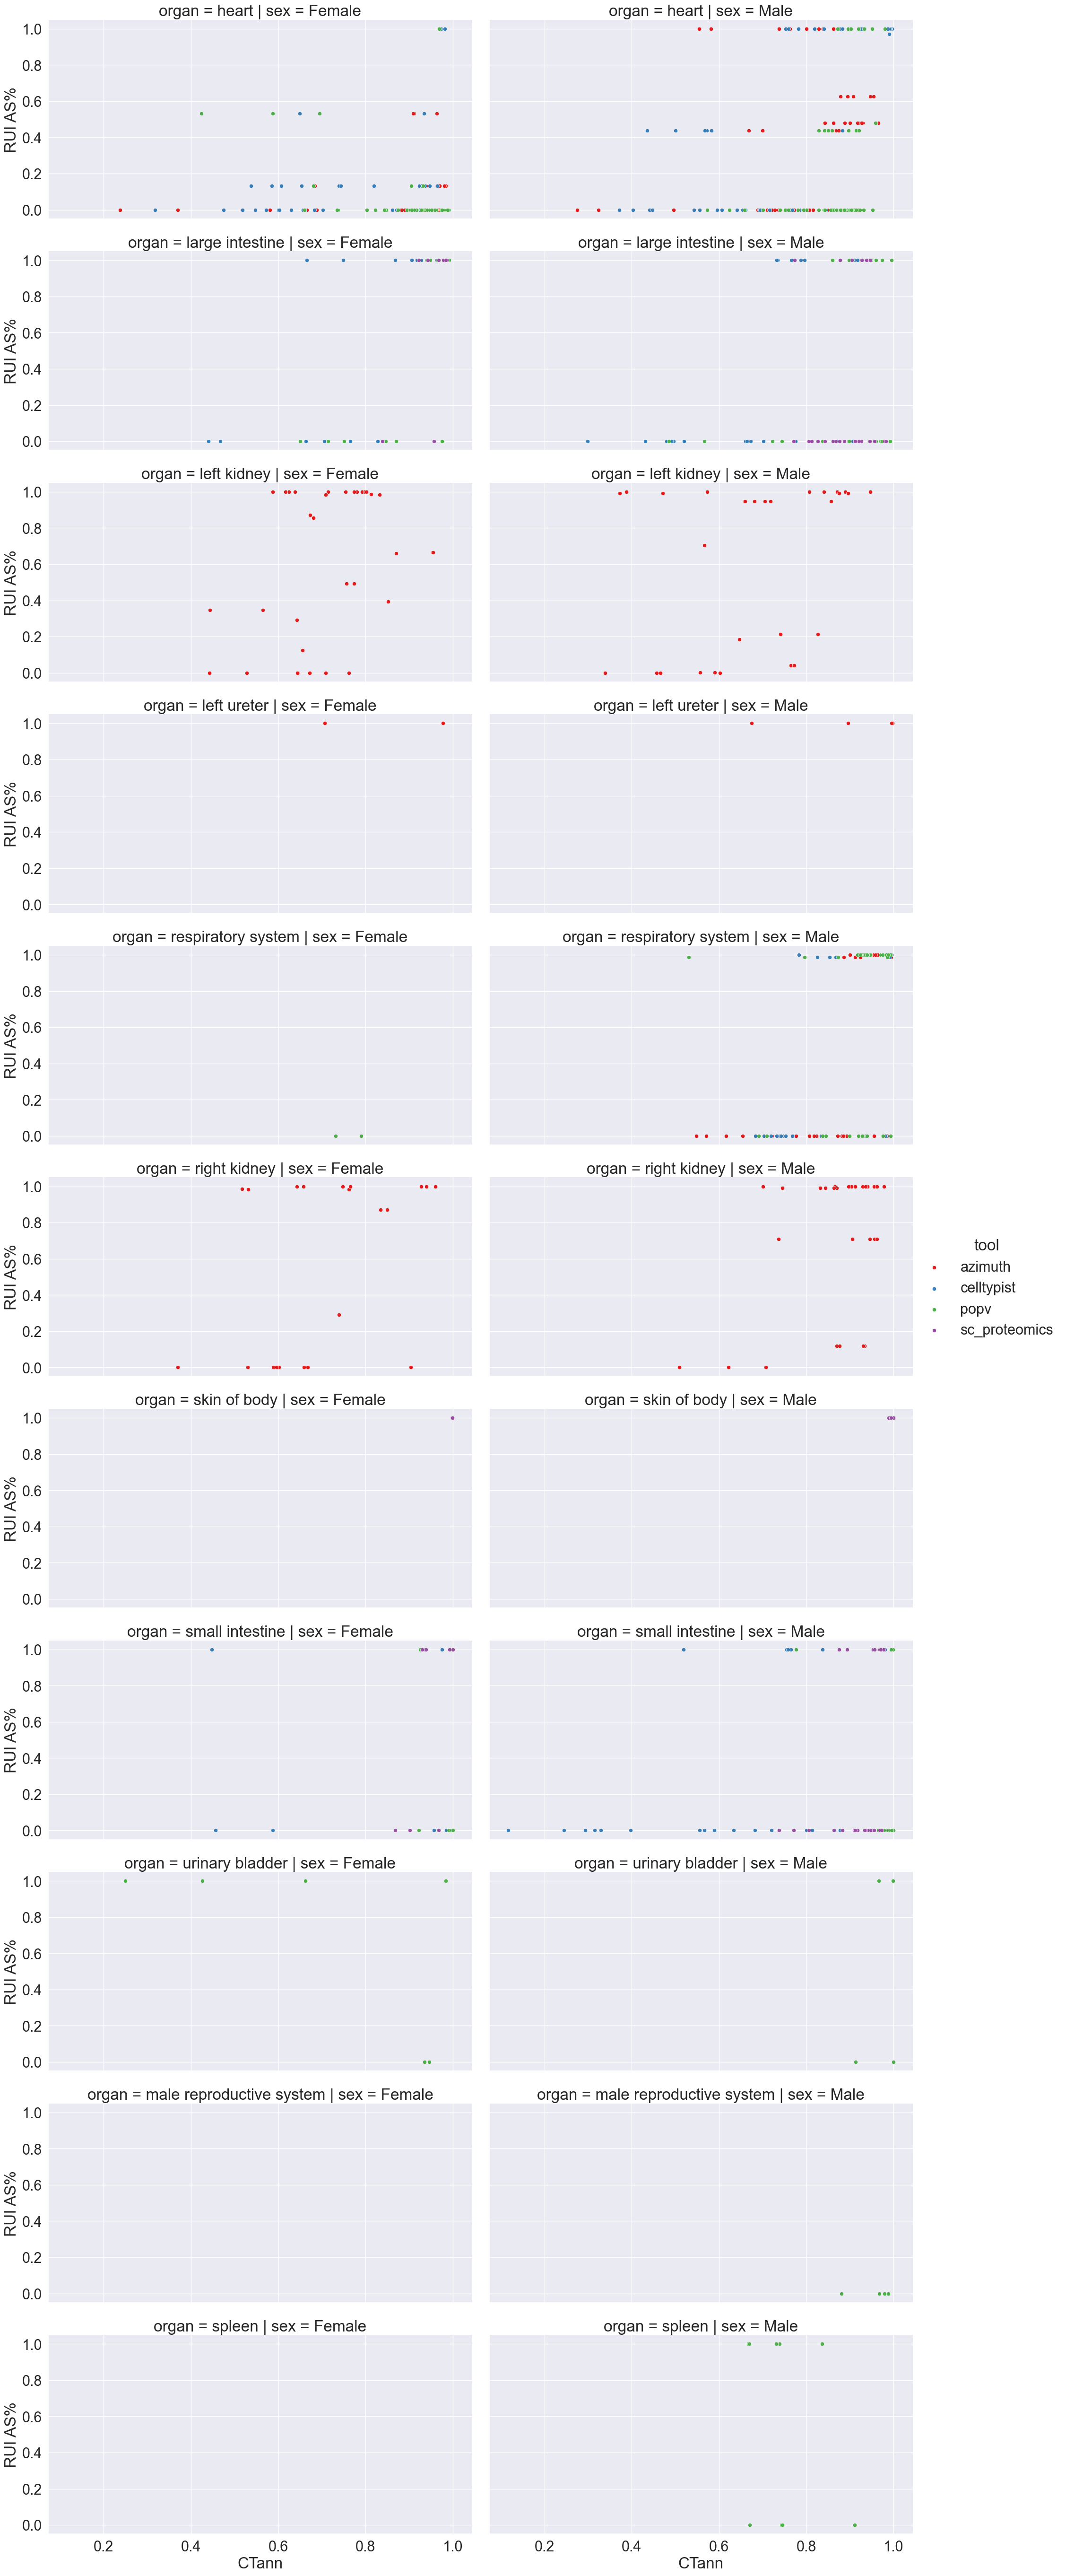

In [ ]:
make_validation_scattergraph(
  "ctann_sim", "rui_sim_as_percentage", "Set1", "sex", "organ", "tool", "CTann", "RUI AS%")

# Old

### CTann vs RUI cosine sim between dataset cell summary vs PREDICTED (most similar) rui location cell summary &#x2705;


In [ ]:
# Correlation
stats = df_subset[['ctann_sim', 'rui_sim_by_cell_summary']]
stats.corr(min_periods=3)

,ctann_sim,rui_sim_by_cell_summary
ctann_sim,1.000000,0.680724
rui_sim_by_cell_summary,0.680724,1.000000


In [ ]:
# Mean, STDDEV, min, etc.
stats.describe()

,ctann_sim,rui_sim_by_cell_summary
count,898.000000,898.000000
mean,0.832648,0.869627
std,0.159287,0.133640
min,0.117205,0.151411
25%,0.743555,0.811778
50%,0.886364,0.914306
75%,0.953453,0.965113
max,1.000000,1.000000


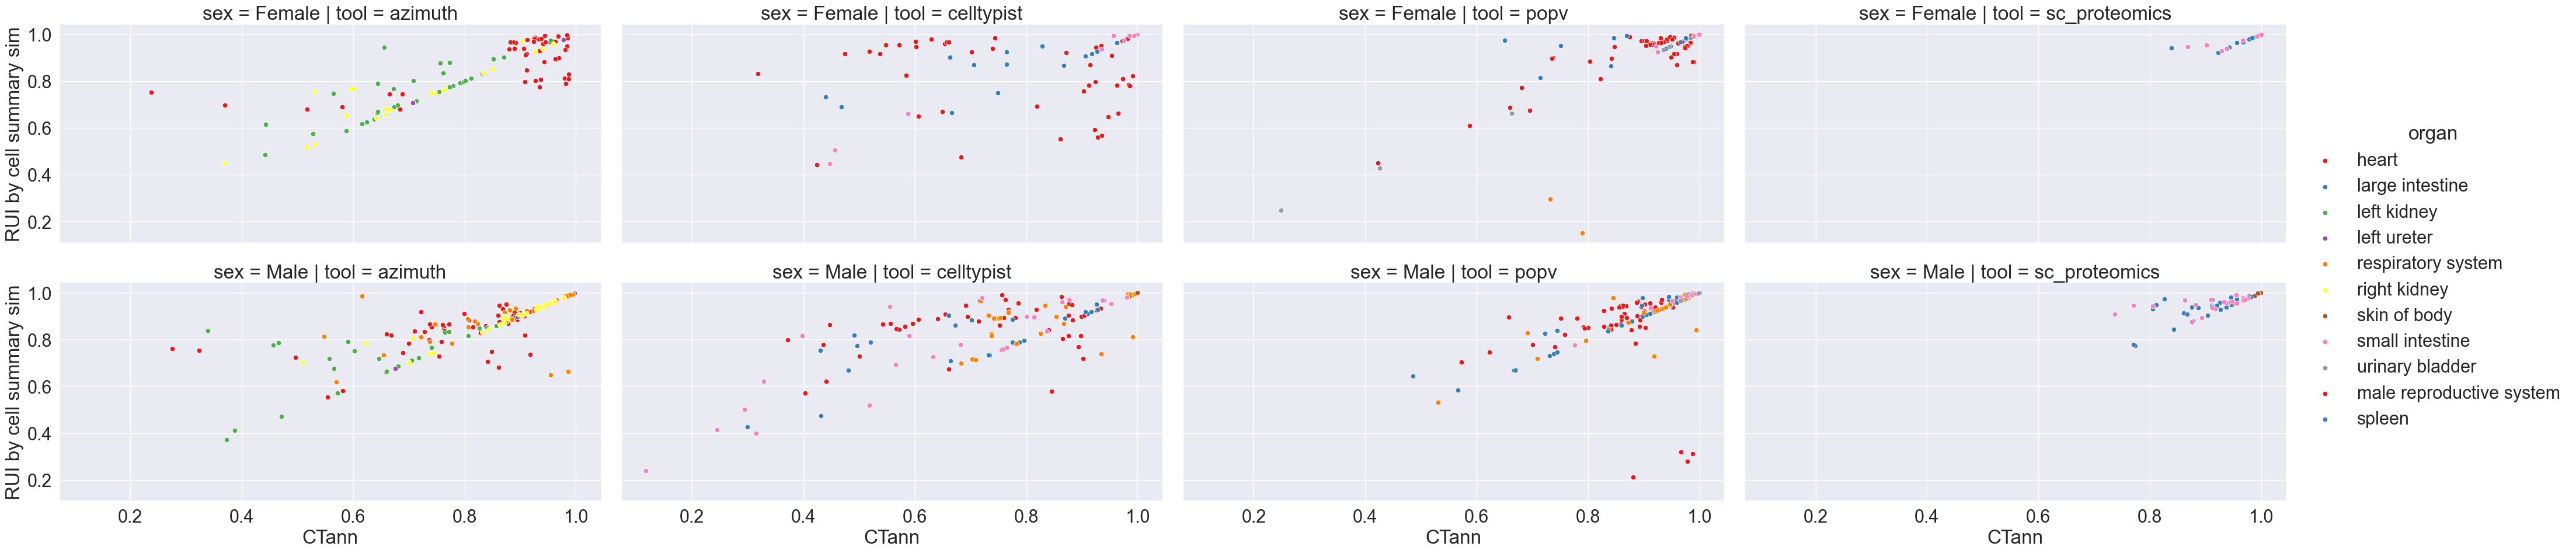

In [ ]:
make_validation_scattergraph(
  "ctann_sim", "rui_sim_by_cell_summary", "Set1", "tool", "sex", "organ", "CTann", "RUI by cell summary sim")